<a href="https://colab.research.google.com/github/rkaclfdl123/TIL/blob/master/%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%82%B4%EA%B0%80_%EC%B6%94%EA%B0%80%ED%95%9C_%EA%B2%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

In [9]:
# 데이터 불러오기
# 모델 학습 파일
train = pd.read_csv('/train.csv')
# 모델 시험지 파일
test = pd.read_csv('/test.csv')
#답안지 파일 
submission= pd.read_csv('//submission.csv')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [11]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


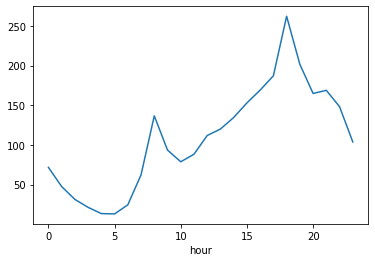

In [12]:
train.groupby('hour').mean()['count'].plot()

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


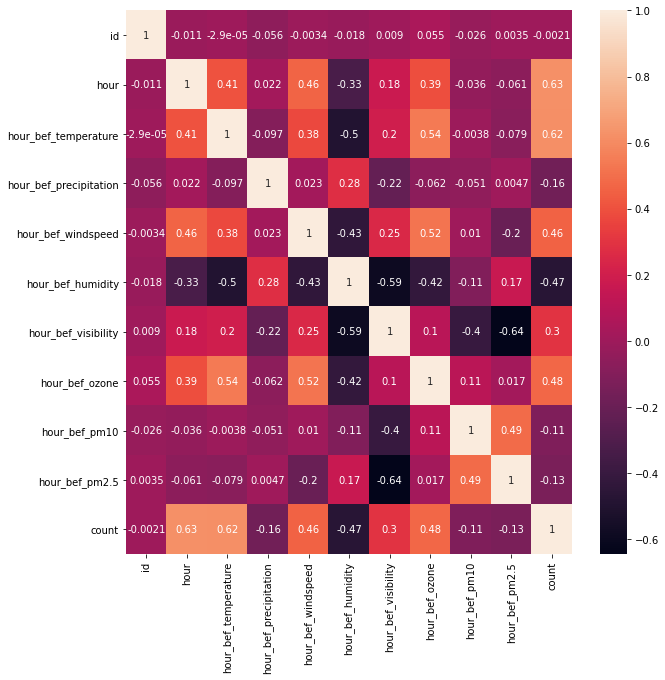

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot = True)

In [35]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone              0
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [50]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone             0
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

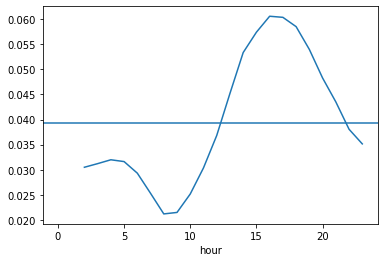

In [17]:
train.groupby('hour').mean()['hour_bef_ozone'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_ozone'].mean())

In [51]:
test['hour_bef_temperature'].fillna(19.704918, inplace=True)
test['hour_bef_windspeed'].fillna(3.595082, inplace =True)

In [40]:
test['hour_bef_ozone'].fillna(0.03918029921448087, inplace =True)

In [39]:
train.groupby('hour').mean()['hour_bef_ozone'].mean()

0.03918029921448087

In [34]:
train[train['hour_bef_ozone'].isna()]


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [24]:
train['hour_bef_ozone'].fillna((0.039149), inplace=True)

In [25]:
train[train['hour_bef_ozone'].isna()].index

Int64Index([], dtype='int64')

In [26]:
train['hour_bef_temperature'].fillna({934:14.788136,1035:20.926667},inplace= True)

In [28]:
train['hour_bef_windspeed'].fillna({18:3.281356, 244:1.836667, 260:1.620000
, 376:1.965517, 780:3.278333, 934:1.965517, 1035:3.838333, 1138:2.766667, 1229:1.633333},inplace= True)

In [52]:
features=['hour','hour_bef_temperature', 'hour_bef_windspeed','hour_bef_ozone']
X_train=train[features]
Y_train=train['count']
X_test=test[features]

In [53]:
model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100,max_depth=5 ,random_state=0)
model200= RandomForestRegressor(n_estimators=200)
#여러개의 나무들에게 각자 결정을 시키고
#가장 많이 나온 결정을 채택??!? 

In [54]:
model100.fit(X_train,Y_train)
model100_5.fit(X_train,Y_train)
model200.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
ypred1=model100.predict(X_test)
ypred2=model100_5.predict(X_test)
ypred3=model200.predict(X_test)

In [56]:
submission['count']=ypred1
submission.to_csv('ozone+model100.csv',index =False)

In [57]:
submission['count']=ypred2
submission.to_csv('ozone+model100_5.csv',index =False)

In [58]:
submission['count']=ypred3
submission.to_csv('ozone+model200.csv',index =False)